# Laboration deep learning AI21

## 0. EDA och filhantering

Creating the folders with python :

In [17]:
import os 

parent_dir = os.getcwd() #get actual directory
main_folders = ["experiment_small_data","experiment_tiny_data","original_data"]
subfolders = ["experiment_small_data/test","experiment_small_data/train","experiment_small_data/val","experiment_tiny_data/test","experiment_tiny_data/train","experiment_tiny_data/val","original_data/train","original_data/test"]

for main_f in main_folders :
    for sub_f in subfolders : 
        sub_f_list = sub_f.split("/") # turn subfolder path into list of folders
        if main_f in sub_f_list : 
            directory_name = sub_f_list[1] #actual directory to make is the 2nd in the list
            path = os.path.join(parent_dir,main_f,directory_name) #creating the folder path
            if not os.path.isdir(path): # check if path doesn't already exist
                try: 
                    os.makedirs(path) #create all missing folders in the folder path 
                except OSError as error: 
                    print(error)

Read in 10 pictures randomly and plot them out, use the label as plot title :

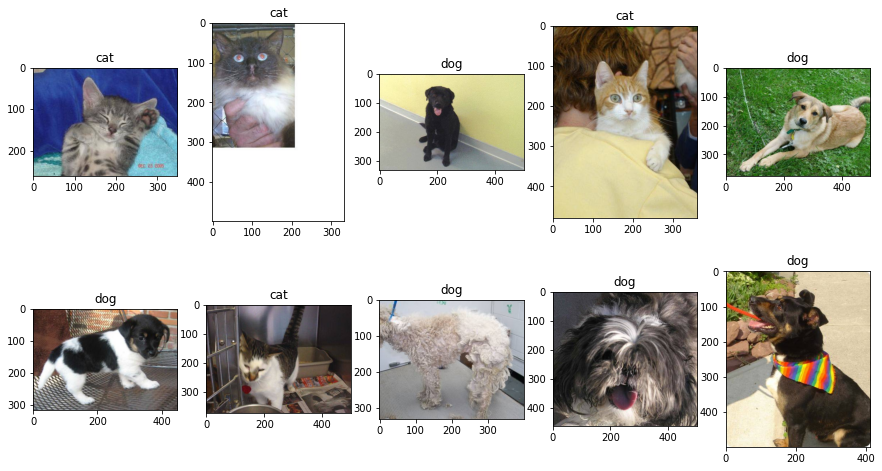

In [23]:
import random
import matplotlib.pyplot as plt
import cv2

parent_dir = os.getcwd() 
folder = "original_data/train/train"

files = random.sample(range(1, 12500), 10)

fig, axes = plt.subplots(2,5, figsize=(15,8))

for file_number,(i, ax) in zip(files,enumerate(axes.flatten())) : 
    animal = random.choice(["cat","dog"])
    file_path = os.path.join(folder,animal+"."+str(file_number)+".jpg")
    image = plt.imread(file_path)
    ax.imshow(image)
    ax.set_title(f"{animal}")


Split the data into train / validation / test :

In [45]:
# splitting the data 
import shutil

source_folder = os.path.join(parent_dir,"original_data","train","train")

for data in ["experiment_small_data","experiment_tiny_data"]:
    folder_name = lambda x : os.path.join(parent_dir,data,x)

    cats = ["cat"+"."+str(x)+".jpg" for x in random.sample(range(1,12500),1250)]
    dogs = ["dog"+"."+str(x)+".jpg" for x in random.sample(range(1,12500),1250)]

    if len(os.listdir(folder_name("train")) ) == 0:
        for cat_picture,dog_picture in zip(cats[:800],dogs[:800]):
            shutil.copy(os.path.join(source_folder,cat_picture),folder_name("train"))
            shutil.copy(os.path.join(source_folder,dog_picture),folder_name("train"))
        
        for cat_picture,dog_picture in zip(cats[800:1000],dogs[800:1000]):
            shutil.copy(os.path.join(source_folder,cat_picture),folder_name("val"))
            shutil.copy(os.path.join(source_folder,dog_picture),folder_name("val"))

        for cat_picture,dog_picture in zip(cats[1000:1250],dogs[1000:1250]):
            shutil.copy(os.path.join(source_folder,cat_picture),folder_name("test"))
            shutil.copy(os.path.join(source_folder,dog_picture),folder_name("test")) 

    else : 
        print(data," folders already filled, please empty the folders from data and try again")

experiment_small_data  folders already filled, please empty the folders from data and try again
experiment_tiny_data  folders already filled, please empty the folders from data and try again
